Let's see if we can read one of the images in data/raw

In [11]:
!pip install -r ../requirements.txt

  Using cached mplcursors-0.6-py3-none-any.whl.metadata (3.0 kB)


In [2]:
from doctr.models import ocr_predictor
from doctr.io import DocumentFile
import matplotlib.pyplot as plt

/Users/thomaschamberlain/Projects/OCR/ocr_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Load OCR model
model = ocr_predictor(pretrained=True)

In [ ]:
# Load the document (image or PDF)
doc_path = '../data/raw/test_img.png'  
doc = DocumentFile.from_images(doc_path)  

# doc = DocumentFile.from_pdf("../data/raw/book_image.pdf")

In [21]:
# Perform OCR
result = model(doc)

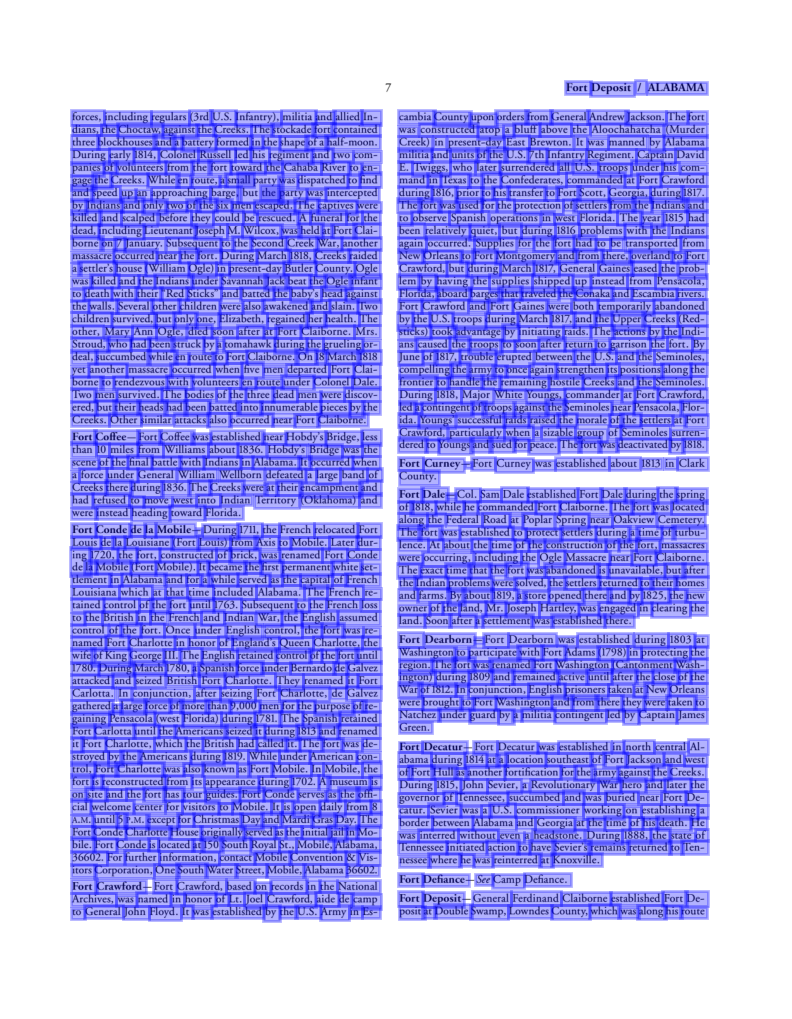

In [22]:
# Visualize the extracted document structure
result.show()

In [24]:
# Print raw OCR output
json_output = result.export()
json_output

{'pages': [{'page_idx': 0,
   'dimensions': (1584, 1224),
   'orientation': {'value': None, 'confidence': None},
   'language': {'value': None, 'confidence': None},
   'blocks': [{'geometry': ((np.float64(0.07663143382352944),
       np.float64(0.0703125)),
      (np.float64(0.9031479779411764), np.float64(0.912109375))),
     'objectness_score': 0.7635528315445115,
     'lines': [{'geometry': ((np.float64(0.7173713235294118),
         np.float64(0.0703125)),
        (np.float64(0.9018841911764706), np.float64(0.0869140625))),
       'objectness_score': 0.7733418345451355,
       'words': [{'value': 'Fort',
         'confidence': 0.9991372227668762,
         'geometry': ((np.float64(0.7173713235294118),
           np.float64(0.0712890625)),
          (np.float64(0.7514935661764706), np.float64(0.0849609375))),
         'objectness_score': 0.827332615852356,
         'crop_orientation': {'value': 0, 'confidence': None}},
        {'value': 'Deposit',
         'confidence': 0.988454282283

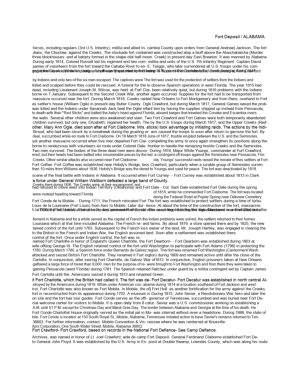

In [23]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()